# Lecture 11
In this example, we will build a **decision tree** to classify iris flowers into three species (setosa, versicolor, or virginica) based on the length and width of the petals and sepals.

In [1]:
# Install packages using Anaconda:
# (1) run 'conda install -c anaconda graphviz'
# (2) run 'pip install pydot'
# (3) add to environment variable PATH
# import os
# os.environ["PATH"] += os.pathsep + 'C:\\Users\\user_name\\Anaconda3\\pkgs\\graphviz-2.38.0-4\\Library\\bin' # replace user_name
# os.environ["PATH"] += os.pathsep + 'C:\\Users\\user_name\\Anaconda3\\Library\\bin\\graphviz' # replace user_name

In [3]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn import tree
from six import StringIO
from sklearn import metrics
import pydot # must be installed separately

In [4]:
# Load dataset
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Explore dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Explore categorical variables
print(data.species.unique())

['setosa' 'versicolor' 'virginica']


In [7]:
# Partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],\
                                                    data['species'], test_size=0.25, random_state = 0)

In [8]:
# Standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_test = scaler.transform(x_test)

In [9]:
# Build decision tree
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
# Show decision tree
model.tree_.__getstate__()['nodes']

array([( 1,  2,  3, -0.54402603, 1.58071971, 112, 112.),
       (-1, -1, -2, -2.        , 0.        ,  37,  37.),
       ( 3,  8,  2,  0.6435042 , 0.99370711,  75,  75.),
       ( 4,  5,  3,  0.54861699, 0.41381685,  36,  36.),
       (-1, -1, -2, -2.        , 0.        ,  32,  32.),
       ( 6,  7,  1,  0.11103029, 0.81127812,   4,   4.),
       (-1, -1, -2, -2.        , 0.        ,   3,   3.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.),
       ( 9, 12,  3,  0.67716324, 0.17203695,  39,  39.),
       (10, 11,  3,  0.54861699, 0.81127812,   4,   4.),
       (-1, -1, -2, -2.        , 0.        ,   3,   3.),
       (-1, -1, -2, -2.        , 0.        ,   1,   1.),
       (-1, -1, -2, -2.        , 0.        ,  35,  35.)],
      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')])

In [11]:
# Plot decision tree
dot_data = StringIO() 
tree.export_graphviz(model, out_file = dot_data, feature_names = data.columns[0:4]) 
figure = pydot.graph_from_dot_data(dot_data.getvalue()) 
figure[0].write_pdf("tree.pdf")

FileNotFoundError: [WinError 2] "dot" not found in path.

In [12]:
# Predict class labels using decision tree
y_pred = model.predict(x_test)
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [13]:
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


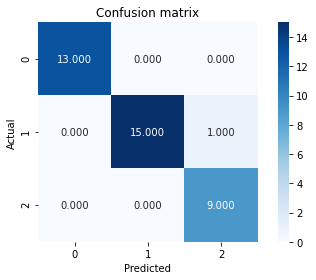

In [14]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [15]:
# Compute accuracy
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [16]:
# Compute error
1 - metrics.accuracy_score(y_test, y_pred)

0.02631578947368418

In [17]:
# Compute precision
metrics.precision_score(y_test, y_pred, average = None)

array([1. , 1. , 0.9])

In [18]:
# Compute recall
metrics.recall_score(y_test, y_pred, average = None)

array([1.    , 0.9375, 1.    ])

In [19]:
# Compute F1 score
metrics.f1_score(y_test, y_pred, average = None)

array([1.        , 0.96774194, 0.94736842])